# Lecture 4: Linear Regression

We're reaching a really exciting part of the course: we're finally starting to work with some predictive models. Over the next two lectures, we're delving into two really exciting problems.

* __Regression__ - predicting a numeric value based on other values that are influence it in some way.
* __Classification__ - assigning a discrete "class" to a data point (for example, either Red or Blue) based on attributes of the data point.

Today, we'll cover a model used for regression. Next lecture, we'll look at an algorithm that is used for both regression and classification.

## Line of Best Fit

Suppose you're a botany major who wants to measure the relationship between two things - for example, the sepal length and sepal width of a species of flower called _Iris setosa_. You decide to plot these measurements on a scatterplot, with length on the $x$-axis and width on the $y$-axis. Luckily, R has a built-in dataset called `iris` (based on a famous experiment done on Iris flowers) that we can use exactly for this purpose.

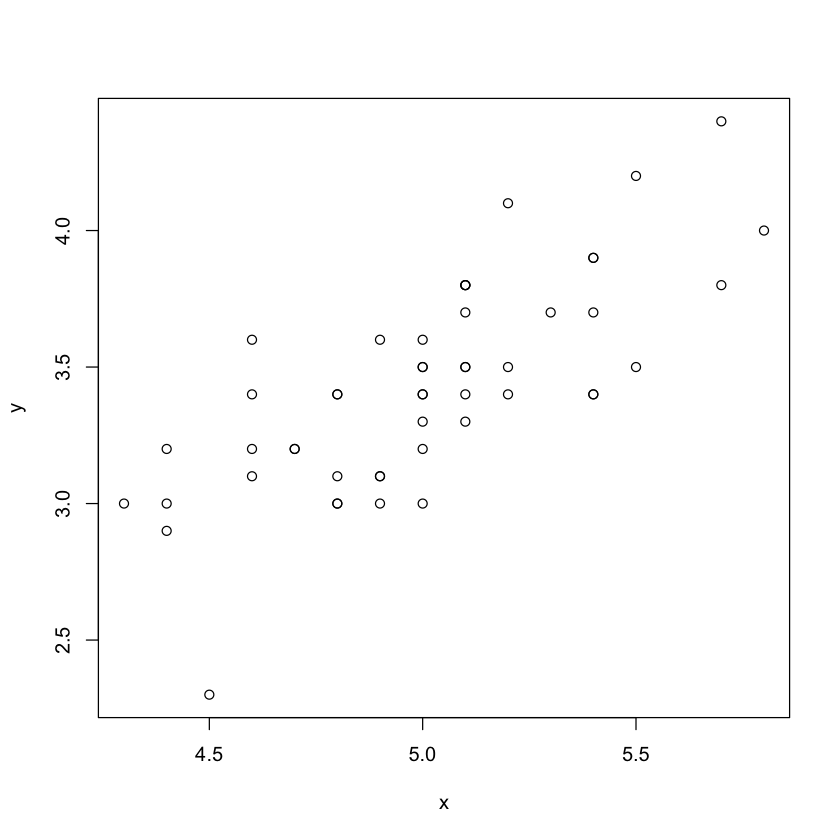

In [7]:
setosa <- iris[iris$Species=="setosa", ]

plot(setosa$Sepal.Length, setosa$Sepal.Width, xlab="x", ylab="y")

When we look at this plot, we immediately grasp that the relationship between $y$ and $x$ appears to be fairly linear aside from some small deviations. We'll assume that the relationship really is linear, and that these deviations happened because of random error. In fact, it's almost as if we can draw an imaginary line around which the data tightly fits. Indeed we can draw this line. Don't worry if you haven't seen the code below before - we're going to analyze it in detail later in the lecture.

In [8]:
abline(lm(Sepal.Length ~ Sepal.Width, data=setosa))

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


Thanks to the line, we can now see that when $x$ is $6$, we can expect $y$ to be approximately $4.5$, even though we have no data point there. Similarly, when $x$ is $4.5$, $y$ is around $2.9$.

In your grade school science classes, you were most likely taught that this is called a "line of best fit." We'll now cover an intuitive and powerful predictive model that formalizes and generalizes this idea to any number of variables. Much of this will already be familiar to you from high school math and science classes, but it's important to thoroughly review this topic since it introduces important concepts that come up in other predictive models.

## Variables, Extrapolation, and Interpolation

We now need to precisely state a few definitions. They will be the scaffolding upon which we build all of our ideas throughout the next few lectures.

* __Dependent variable__ - the quantity that we are trying to predict.
* __Independent variables__ - data that influence the dependent variable in some way.
* __Hypothesis__ - a mathematical relationship between the independent variables and dependent variables.
* __Extrapolation__ - a form of prediction where we estimate values outside the range of observation.
* __Interpolation__ - a form of prediction where we estimate values within "gaps" inside the range of observation.

Both extrapolation and interpolation are forms of _inductive reasoning_, in which a general rule is applied to a specific observation.

## Statistics: A Brief Interlude

Before we continue, we recognize that some students in the class might not have a backround in statistics. Because of this, we want to get you up to speed on a few statistics terms. If you've already taken a statistics course, feel free to skip this section.

### Distributions and Single-Variable Data Sets

We do assume that you know some probability (for example, what probability is and what the axioms of probability are) since it's taught at the grade school level. One thing that we should clarify is the idea of a __probability distribution__, since in this course we'll be speaking occasionally of distributions. A distribution is an assignment of probabilities to possible data points. For example, we could say that we expect a certain Boolean variable in a data set to take on the value `true` 50% of the time and the value `false` 50% of the time. This is a __uniform distribution__, since all outcomes are equally likely. 

You'll often see the distribution as a function $p(x)$ relating outcomes to probabilities.

Another important distribution is the __normal distribution__ or __Gaussian__, named after the esteemed Carl Friedrich Gauss. We won't be going into mathematical detail (the exact formula is bizarre looking although you can find the two dimensional formula here: http://patentimages.storage.googleapis.com/WO2010053874A1/imgf000014_0001.png). However, you should know that it's a bell-shaped curve, with much of the data concentrated at the mean and very little of the data at the periphery. An image can be found below:

(insert image)

Can you think of a few real-life scenarios that model this behavior? Some examples we could think of include test scores, height, and weight.

Two important properties of a single-variable dataset are __mean__ and __variance__. 

The __mean__, often called __expected value__, is defined as

$$ E[X] = \int_{-\infty}^{\infty} xp(x)dx $$

where $x$ represents all the possible values of the variable $X$.

One way of thinking of this is the average value of the data - a weighted sum of all possible values, weighted by their respective probabilities of occurring. Another way to think of this is the value you'd expect to see if you began picking data points out of a hat. 

A more visual and intuitive way to think of the mean is that it's the center of the data. If each data point contributed a unit of mass to the overall distribution, the mean would be at the center of mass.

The __variance__ of the data quantifies how spread out the data is. A small variance implies that the data is mostly concentrated in a single place. A large variance means that the data is evenly spread out over a large range.

The variance is defined as

$$ Var(X) = E[(X - E[X])^2] $$

To put it in words, the variance is the mean of the square of the distance from each data point to the mean of the dataset. (If you're confused, try carefully thinking about the preceding statement and what it means visually.) If this average squared distance is large, the data is spread out since many points are far from the mean of the dataset. If the average squared distance small, this means that many data points are close to the mean.

The square root of the variance is often called the __standard deviation__, and is sometimes used in place of variance as a measure of spread. Standard deviation is denoted as $\sigma_X$.

### Multi-Variable Data Sets

How can two variables relate to each other? One natural relationship is that when we see an increase in values in one variables, we see an increase or decrease in values in the other variable. This idea is called __correlation__. To introduce it, we first talk about __covariance__, a generalization of variance to two variables.

We define covariance between two variables as

$$ Cov(X, Y) = E[(X-E[X])(Y-E[Y])] $$

Notice how $ Cov(X, X) = Var(X) $. Covariance can either be positive or negative. A covariance with a large magnitude indicates that one variable is sensitive to changes in another. A covariance with a small magnitude indicates the opposite.

Covariance is a flawed metric, since the magnitudes of the data points can artifically skew the result one way or the other. Imagine two variables, both measured in kilometers. The covariance of the two variables is recorded and is a small value. Imagine that the datasets are then scaled such that the measurements are in centimeters. Even though the relationship between the datasets is the same, the covariance is likely to be much larger! Changes in scale can inflate or deflate covariance.

Because of this, we use __correlation__ instead. Correlation is the same as covariance, but it is scaled down by the standard deviations of the two variables. It is defined as

$$ Cor(X, Y) = \frac{Cov(X, Y)}{\sigma_X \sigma_Y} $$

An intuitive way to think about correlation is "the degree of linear relationship between two variables." Since it's scaled down, correlation can take on values between -1 and 1. A correlation of -1 indicates a perfectly negative linear relationship while a correlation of 1 indicates a perfectly positive linear relationship. A correlation of 0 indicates no linear relationship.

(insert images of negative, zero and positive correlation here)

## Simple Linear Regression

Let's refer back to the example of sepal width and length. We can formally state this as a __simple linear regression__ problem. We would like to obtain a linear hypothesis function $\hat{y} = B_0 + B_1x_1$. You might recognize $B_0$ as a "y-intercept" and $B_1$ as the "slope" of a linear equation. We'll call both of these values __coefficients__.

Our goal is to choose a set of coefficients B_0 and B_1 such that we minimize __error__ (the distance of all of our data points from our hypothesis line in the plane).

### Least-Squares Error

To compute the total error associated with a simple linear regression model given some existing data points, we use the following process:

* Start with total error = 0.
* For each $x$ value, we compute what the predicted value of $y$ (which we've been referring to as $\hat{y}$) should be given our model. 
* We then compute the distance from this value to the actual value of $y$ at this value of $x$. We use the square of the Euclidean distance formula to calculate this distance ($(\sqrt{(y - \hat{y})^2})^2 = (y - \hat{y})^2$).
* Add this distance to the total error.

For example, suppose we had the single data point (5, 6). If our model is represented by the linear equation $y = 3 + 2x$, then our total error would be $(6 - (3 + 2(5)))^2 = 49$. This method of using Euclidean distance to compute total error is called __least-squares error__ (or __sum of squared error__). The formula version of this, given that we have $n$ data points, is:

$$ \sum_{j = 1}^{n} (y_j - \hat{y})^2 $$

For those of you who are proficient in calculus, here is a link to an explanation on how to do simple linear regression using differentiation: https://www.amherst.edu/system/files/media/1287/SLR_Leastsquares.pdf

## Multiple Linear Regression

Things get slightly more complicated when we add several variables, but for our purposes we won't dive too deeply into it. Here's what you need to know.

### Redefinitions

Suppose we now have $k$ variables. Instead of an easily plottable line in 2-dimensional space, our goal is to obtain a linear hypothesis function (a hyperplane) in $k+1$-dimensional space: we have $k$ $x_i$'s to take into account plus one y-intercept.

Now the goal of linear regression can be restated:

$$ \hat{y} = B_0 + B_1x_1 + ... + B_kx_k = B_0 + \sum_{i=1}^{k} B_ix_i $$

Our least squares calculation remains the same, except instead of using our single-variable linear function to compute the theoretical value of the dependent variable, we now use the many-variable equation. The final version of the least-squares error formula looks like this:

$$ SSE = \sum_{j=1}^{n} (y_j - \hat{y})^2 = \sum{j=1}^{n} (y_j - (B_0 + \sum_{i=1}^{k} B_ix_i))^2 $$

It's important to remember what coefficients mean in the multi-variable case now that we no longer have the familiar analogues of "slope" and "y-intercept" to guide us. Precisely put, a coefficient $B_i$ for $x_i$ is the increase in $y$ associated with a 1-unit increase in $x_i$. In other words, keeping everything else the same, $B_i$ is the amount that $y$ changes if we increase $x_i$ by 1.

## Using R

Now it's time to create a full linear regression model using R. We're going to go over how to create the "line of best fit" seen earlier in detail.

We start by creating a variable representing our model. We'll call this variable `reg`. To create this model we can use R's `lm` function, which takes a special syntax:

* Notice the `Sepal.Width ~ Sepal.Length` in the code below. This can be read as "the column `Sepal.Width` _depends on_ the column `Sepal.Length`." The independent variables (the right hand side of this expression) can be generalized to any number of columns in a vector. An example of this could be `Income ~ c(Education, Age)`.

* We pass our data frame into the `data` argument so that we know what data frame these columns are in.

Execute the statement below and observe the output.

In [9]:
reg <- lm(Sepal.Width ~ Sepal.Length, data=setosa)
summary(reg)


Call:
lm(formula = Sepal.Width ~ Sepal.Length, data = setosa)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72394 -0.18273 -0.00306  0.15738  0.51709 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.5694     0.5217  -1.091    0.281    
Sepal.Length   0.7985     0.1040   7.681 6.71e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2565 on 48 degrees of freedom
Multiple R-squared:  0.5514,	Adjusted R-squared:  0.542 
F-statistic: 58.99 on 1 and 48 DF,  p-value: 6.71e-10


We've obtained a summary table for our model that lists the key statistics of the model. Here are the most important parts:

* `Estimate` in the `Coefficients` table: these are the values of $B_0$ and $B_1$ we were looking for. These are our coefficients.
* The stars next to the `Sepal.Length` coefficient: these represent how significant a coefficient is to the model. More stars indicates greater significance. Since the `Sepal.Length` variable has three stars attached to its coefficient, we know it's a very significant part of our model. (We can typically remove variables that have 0 or 1 star significance codes with little effect on model performance).
* `Residual standard error` is a way of measuring the total error of the data set relative to the regression model. More specifically, it's the square root of the mean squared error, which is what you get when you divide the total SSE by the number of observations [1].
* `Multiple R-squared` is an important way of measuring how good the model is at fitting the data. We will discuss this below.

## Assumptions of Linear Regression

You may not have realized it at first, but linear regression is an example of machine learning. The task at hand is function approximation, where we attempt to find structure within a data set. 

More specifically, linear regression is a __parametric learning method__: we know what the general structure of the data is, but our task is to find the specific parameters that best fit the data. In our case, the structure is that of a linear function, and the parameters are the coefficients.

This assumption about structure comes with a few other assumptions. These assumptions, when combined, form the precondition of the __Gauss-Markov theorem__, which states that the estimates for the coefficients obtained by our least-squares linear regression model is the best estimator of the actual coefficients. Without these assumptions, the theorem is false.

Here are the necessary assumptions, along with a brief description of how to fix them.

* _Assumption_: The dependent variable and independent variables truly have a linear relationship.

  _What to do if violated_: If your scatterplot doesn't look quite linear, you can transform the data to make it linear. For example, you could model the relationship between $y$ and $log(x)$ instead of $y$ and $x$, or between $\sqrt{y}$ and $x$. [2]
  
* _Assumption_ (Gauss-Markov condition 1): The errors have mean 0.

  _What to do if violated_: You can use a Box-Cox power transformation to give your errors a normal distribution with mean 0 [3]. For further reading, check out this link: https://www.r-bloggers.com/on-box-cox-transform-in-regression-models/
  
* _Assumption_ (Gauss-Markov condition 2): The errors are independent.

  _What to do if violated_: This can sometimes be violated when you have time-series data - error at time $t+1$ could depend on error at time $t$ (this is called _serial correlation_). Unfortunately, how to fix these errors is outside the scope of this course, but one possibility is that the independent variables interact in such a way that the errors are "grouped together" in certain regions. You can add _interaction terms_ (new independent variables that are products of independent variables) to fix this. [4]
  
* _Assumption_ (Gauss-Markov condition 3): The errors have constant variance.

  _What to do if violated_: This assumption is often violated when the variance of errors increases as data values increase (for example, on a plot of income vs. age, the variance of error in income could increase with age). This violation is called __heteroskedasticity__. [5] Luckily, this scary-sounding condition is easily rectified. Check out this helpful link: https://www.r-bloggers.com/how-to-detect-heteroscedasticity-and-rectify-it
  
  
For a more detailed explanation of the above assumptions and violations, including how to diagnose violations of these assumptions, here's a comprehensive guide: http://people.duke.edu/~rnau/testing.htm

## P-values: A Brief Digression

Once we have a linear regression model, we can check with high confidence whether there is any linear relationship at all. Most statisticians and data scientists use an agreed-upon definition of __statistical significance__ to see if a relationship exists.

This agreed-upon definition comes in the form of __p-values__. Simply put, a p-value is the probability that the data just so happens to appear linearly related when there in fact isn't a true linear relationship between the independent and dependent variables. This is called the "null hypothesis." You can see the p-value in the summary() function for any linear regression model in R (see the "Interpreting R Output" section).

If our p-value is less than 0.05 (a semi-arbitrary number that statisticians came up with), we say the relationship is statistically significant - we most likely have a real relationship! Otherwise, we can't say for sure whether there is a significant relationship. In statistics terminology, we say that we "fail to reject the null hypothesis." For more on p-values, take an introductory statistics course (ENGRD 2700 for Cornell Engineering students).

## Oh Goodness!

A question that naturally comes up when we do any sort of predictive modeling is: "How well does our model predict data?" This is typically called the __goodness__ of the model.

An industry-standard metric for model goodness is called $R^2$. One textbook defines $R^2$ as the "proportion of the variability in [the dependent variable] that can be explained using [the independent variable]" [6]. If most of this variability can be explained ($R^2$ is close to 1), we have succeeded in building a model that captures the relationships between the variables. If not ($R^2$ is close to 0), we can probably do better.

We compute this metric in several steps:

1. Create a __benchmark model__, a naive model that always predicts the mean of the dependent variable.
2. Compute the sum of squared terms (SST), which is the sum of squared errors applied to the benchmark model. The formula for this is

$$ SST = \sum_{j = 1}^{n} (y_j - \overline{y})^2 $$

3. Compute the sum of squared errors (SSE) of the model that we're evaluating. The formula here is

$$ SSE = \sum_{j = 1}^{n} (y_j - \hat{y})^2 = \sum_{j=1}^{n} (y_j - (B_0 + B_1x_1 + ... + B_kx_k))^2 = \sum_{j=1}^{n} (y_j -  (B_0 + \sum_{i=1}^{k} B_ix_i))^2 $$

4. We then subtract the ratio between SSE and SST from 1:

$$ R^2 = 1 - \frac{SSE}{SST} $$

## Predicting Values

So far, everything we've looked at is __in-sample__, meaning that all of our calculations evaluate how well the model fits the observed data. In machine learning scenarios, we typically call this sample data the __training set__. This is data for which we already "know the answer" - data for which we've already observed the mapping between the independent variables and dependent variable.

Fitting our model to data is great, but ultimately our goal is to predict things __out-of-sample__. The set of independent variable values for which we want to predict the dependent variable is called the __testing set__. We want to be able to interpolate and extrapolate for the points in our testing set using our model. For this, we can evaluate our linear regression function manually or use R.

* Manual evaluation: Using our coefficients from the model above, we can evaluate our linear regression model at any point along the line. For example, when $x = 3$:

$$ \hat{y} = B_0 + B_1x = -0.5694 + 0.7985(3) = 1.826 $$

* Using R: We can use the `predict` function to compute the value automatically.

Let's predict the sepal width of setosa using one sample from setosa. We picked the first input in the setosa to be predicted.

In [32]:
setosa[1,]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
3,4.7,3.2,1.3,0.2,setosa


The model wants to predict 3.5 using Sepal.Length. But before creating the model, we need to remove this particular setosa from the data, because we want to hide the "answer" from the model.

In [33]:
# remove first index
setosa <- setosa[-1,]

# Now use predict function
model <- lm(Sepal.Width ~ Sepal.Length, data=setosa)
predict(model, data.frame(Sepal.Length=5.1))

1 
3.509597

As you see, the model gives us very accurate estimate.
But what if we do not know that the species is setosa? Can we still guess it correctly? To simulate this situation, we are going to use whole iris data to create a model.

In [34]:
# use iris dataset to predict
model <- lm(Sepal.Width ~ Sepal.Length, data=iris)
predict(model, data.frame(Sepal.Length=5.1))

1 
3.103334

Now the prediction is a bit off. This is because other species's data will affect the model. 
Let's use more than 1 variable and see if the model performs better.

In [35]:
# use iris dataset but more variables
model2 <- lm(Sepal.Width ~ Sepal.Length + Petal.Length, data=iris)
predict(model2, data.frame(Sepal.Length=5.1, Petal.Length = 1.4))

model3 <- lm(Sepal.Width ~ Sepal.Length + Petal.Length + Petal.Width, data=iris)
predict(model3, data.frame(Sepal.Length=5.1, Petal.Length = 1.4, Petal.Width = 0.2))

1 
3.430744

1 
3.430287

Even though, both models do not know the species we are predicting is setosa, they perform better than the original model. But you see the third model performed a little bit worse than the second one. Does this mean third model is a worse model than the second one? We are going to test the accuracy of models in more general point of view by predicting not one but many data points from the iris.

In [42]:
# use 30 random points to test models

set.seed(111) # set the seed for consistancy

index <- sample(150,30)
test.iris <- iris[index,]
train.iris <- iris[-index,]

# make model with train.iris, then predict all points from test.iris
model <- lm(Sepal.Width ~ Sepal.Length, data=train.iris)
pred <- predict(model, test.iris)

model2 <- lm(Sepal.Width ~ Sepal.Length + Petal.Length, data=train.iris)
pred2 <- predict(model2, test.iris)

model3 <- lm(Sepal.Width ~ Sepal.Length + Petal.Length + Petal.Width, data=train.iris)
pred3 <- predict(model3, test.iris)

There are multiple ways to measure the correctness of models. Even though we could simply take squared errors, we are going to use RMSLE, Root Mean Squared Logarithmic Error, shown by the following formula.

$$Error = \sqrt{ \frac{1}{n}\sum^n_{i=1}log(prediction)^2 - log(actual)^2 }$$

In [47]:
# value models by RMSLE
sqrt(mean((log(pred)-log(test.iris$Sepal.Width))^2,na.rm=TRUE))
sqrt(mean((log(pred2)-log(test.iris$Sepal.Width))^2,na.rm=TRUE))
sqrt(mean((log(pred3)-log(test.iris$Sepal.Width))^2,na.rm=TRUE))

[1] 0.1516585

[1] 0.1231804

[1] 0.1114508

As you can see, the third model predicts more acurate value overall since the error is smaller!

## Terms to Review

* Regression
* Classification
* Dependent variable
* Independent variable
* Extrapolation
* Interpolation
* Probability distribution
* Gaussian
* Mean
* Variance
* Standard deviation
* Covariance
* Correlation
* Simple linear regression
* Coefficients
* Error
* Least squares error / sum of squared error
* Multiple linear regression
* Statistical significance
* P-value
* Gauss-Markov theorem
* Heteroskedasticity
* Model goodness
* $R^2$
* Benchmark model
* In-sample / training set
* Out-of-sample / testing set


## Sources

[1] http://stats.stackexchange.com/questions/57746/what-is-residual-standard-error

[2] http://stats.stackexchange.com/questions/29731/regression-when-the-ols-residuals-are-not-normally-distributed

[3] http://blog.minitab.com/blog/the-statistics-game/checking-the-assumption-of-constant-variance-in-regression-analyses

[4] http://people.duke.edu/~rnau/testing.htm

[5] https://www.r-bloggers.com/how-to-detect-heteroscedasticity-and-rectify-it/


[6] Hastie, Trevor, et al. "An Introduction to Statistical Learning."
